# 2. Morfología y análisis morfógico

## Objetivo

- Que los alumnæs aborden la tarea del análisis morfologico
- Hacer una comparación entre un enfoque basado en reglas y uno estadístico para resolver una tarea común de NLP

## ¿Qué es morfología?

La morfología es uno de los niveles de la lengua que estudia los procesos que conforman una palabra.

> Morfología es el estudio de la estructura interna de las palabras (Bauer, 2003)

- niñ-o
- niñ-a
- niñ-o-s
- gat-a-s

- Con la morfología podemos identificar como se modifica el significado variando la estructura de las palabras
- Tambien las reglas para producir:
    - niño -> niños
    - niño -> niña
- Tenemos elementos mínimos, intercambiables que varian el significado de las palabras: **morfemas**

> Un morfema es la unidad mínima con significado en la producción lingüística (Mijangos, 2020)

### Tipos de morfemas

- Bases: Subcadenas que aportan información léxica de la palabra
    - sol
    - frasada
- Afijos: Subcadenas que se adhieren a las bases para añadir información (flexiva, derivativa)
    - Prefijos
        - *in*-parable
    - Subfijos
        - pan-*ecitos*, come-*mos*

## Analisis morfológico

La morfología es uno de los niveles más básicos del lenguaje que se puede estudiar. En ese sentido, una de las tareas más básicas del NLP es el análisis morfológico:

> El análisis morfológico es la determinación de las partes que componen la palabra y su representación lingüística, es una especie de etiquetado

Los elementos morfológicos son analizados para:

- Determinar la función morfológica de las palabras
- Hacer filtrado y pre-procesamiento de texto

## Ejercicio con sustantivos en español

In [1]:
palabras = [
    'niño',
    'niños',
    'niñas',
    'niñitos',
    'gato',
    'gatos',
    'gatitos',
    'perritos',
    'paloma',
    'palomita',
    'palomas',
    'flores',
    'flor',
    'florecita',
    'lápiz',
    'lápices',
    #'chiquitititititos',
    #'curriculum', # curricula
    #'campus', # campi
]

In [5]:
import re

def morph_parser_rules(words: list[str]) -> list[str]:
    """Aplica reglas morfológicas a una lista de palabras para realizar
    un análisis morfológico.

    Parameters:
    ----------
    words : list of str
        Lista de palabras a las que se les aplicarán las reglas morfológicas.

    Returns:
    -------
    list of str
        Una lista de palabras después de aplicar las reglas morfológicas.
    """

    #Lista para guardar las palabras parseadas
    morph_parsing = []

    # Reglas que capturan ciertos morfemas
    # {ecita, itos, as, os}
    for w in words:
        #ecit -> DIM
        R0 = re.sub(r'([^ ]+)ecit([a|o|as|os])', r'\1-DIM\2',w)
        #it -> DIM
        R1 = re.sub(r'([^ ]+)it([a|o|as|os])', r'\1-DIM\2',R0)
        #a(s) -> FEM
        R2 = re.sub(r'([^ ]+)a(s)', r'\1-FEM\2',R1)
        #a -> FEM
        R3 = re.sub(r'([^ ]+)a\b', r'\1-FEM',R2)
        #o(s) -> MSC
        R4 = re.sub(r'([^ ]+)o(s)', r'\1-MSC\2',R3)
        #o .> MSC
        R5 = re.sub(r'([^ ]+)o\b', r'\1-MSC',R4)
        #es -> PL
        R6 = re.sub(r'([^ ]+)es\b', r'\1-PL',R5)
        #s -> PL
        R7 = re.sub(r'([^ ]+)s\b', r'\1-PL',R6)
        #Sustituye la c por z cuando es necesario
        parse = re.sub(r'c-', r'z-', R7)

        #Guarda los parseos
        morph_parsing.append(parse)
    return morph_parsing

morph_parsing = morph_parser_rules(palabras)
for palabra, parseo in zip(palabras, morph_parsing):
    print(palabra, "-->", parseo)


niño --> niñ-MSC
niños --> niñ-MSC-PL
niñas --> niñ-FEM-PL
niñitos --> niñ-DIM-MSC-PL
gato --> gat-MSC
gatos --> gat-MSC-PL
gatitos --> gat-DIM-MSC-PL
perritos --> perr-DIM-MSC-PL
paloma --> palom-FEM
palomita --> palom-DIM-FEM
palomas --> palom-FEM-PL
flores --> flor-PL
flor --> flor
florecita --> flor-DIM-FEM
lápiz --> lápiz
lápices --> lápiz-PL


**Preguntas:**
- ¿Qué pasa con las reglas en lenguas donde son más comunes los prefijos y no los sufijos?
- ¿Cómo podríamos identificar características de lenguas?

### Lemmatizando ando

La lemmatización es un proceso para obtener las palabras tal cual vendrían en un diccionario. Es un proceso difícil de realizar dado se utilizan diccionarios hechos a mano.

Estos diccionarios deben contener los stems de las palabras. Por tanto la lemmatización dependerá de un paso previo; *stemming*

In [6]:
lemas = {'gat':'gato','niñ':'niña', 'palom':'paloma', 'perr': 'perro'}

In [7]:
# sustitución de stems por lemmas
lema_parsing = []

for p in morph_parsing:
    try:
        # Busca el stem en la cadena parseada
        stem = re.match(r'[^-]+', p).group(0)
        # stem -> lema
        lema = p.replace(stem, lemas[stem])
    except:
        # Si la palabra no tiene tags, se deja tal como está
        lema = p

    # Guarda los lemas
    lema_parsing.append(lema)

    print(lema)

niña-MSC
niña-MSC-PL
niña-FEM-PL
niña-DIM-MSC-PL
gato-MSC
gato-MSC-PL
gato-DIM-MSC-PL
perro-DIM-MSC-PL
paloma-FEM
paloma-DIM-FEM
paloma-FEM-PL
flor-PL
flor
flor-DIM-FEM
lápiz
lápiz-PL


## Corpus: [SIGMORPHON 2022 Shared Task on Morpheme Segmentation](https://github.com/sigmorphon/2022SegmentationST/tree/main)

- Shared task donde se buscaba convertir las palabras en una secuencia de morfemas
    - ¿Qué es un shared task?
- Dividido en dos partes:
    - Segmentación a nivel de palabras (nos enfocaremos en esta)


### Track: WORDS

| word class | Description                      | English example (input ==> output)     |
|------------|----------------------------------|----------------------------------------|
| 100        | Inflection only                  | played ==> play @@ed                   |
| 010        | Derivation only                  | player ==> play @@er                   |
| 101        | Inflection and Compound          | wheelbands ==> wheel @@band @@s        |
| 000        | Root words                       | progress ==> progress                  |
| 011        | Derivation and Compound          | tankbuster ==> tank @@bust @@er        |
| 110        | Inflection and Derivation        | urbanizes ==> urban @@ize @@s          |
| 001        | Compound only                    | hotpot ==> hot @@pot                   |
| 111        | Inflection, Derivation, Compound | trackworkers ==> track @@work @@er @@s |

### Obteniendo el corpus

In [ ]:
import requests
r = requests.get("https://raw.githubusercontent.com/sigmorphon/2022SegmentationST/main/data/spa.word.test.gold.tsv")
r.text[:1000]

'astronómica\tastronómico @@a\t100\nresignifiques\tresignificar @@es\t100\nimportunamente\timportuno @@mente\t010\nconjeturaríamos\tconjeturar @@ría @@amos\t100\nadquiridla\tadquirir @@id @@la\t100\ndeslocalizadla\tdes @@local @@izar @@ad @@la\t110\nazafránenla\tazafrán @@ar @@en @@la\t110\nabocinado\tabocinar @@ado\t100\nmájalo\tmajar @@á @@lo\t100\ntroquelabais\ttroquel @@ar @@ba @@ais\t110\npolinizándolas\tpolinizar @@ando @@las\t100\ndiafragmáis\tdiafragma @@ar @@áis\t110\nneutralizase\tneutral @@izar @@ase\t110\ncuchareara\tcuchara @@ear @@ara\t110\nenfríen\tenfriar @@en\t100\ncastañeteabais\tcastaña @@eta @@ear @@ba @@ais\t110\natúsales\tatusar @@á @@les\t100\nantecedámonos\tanteceder @@amos @@nos\t100\nbarbotaría\tbarbotar @@ría\t100\nprevieres\tpre @@ver @@iere @@es\t110\nentallándoos\ten @@talla @@ar @@ando @@os\t110\natraparlos\tatrapar @@los\t100\ncarrete\tcarro @@ete\t010\ndudarme\tduda @@ar @@me\t110\nchismeemos\tchisme @@ar @@emos\t110\nagarraré\ta @@garra @@ar @@aré\t110

In [ ]:
raw_data = r.text.split("\n")
raw_data[-2]

'sumárieles\tsumario @@ar @@e @@les\t110'

In [ ]:
element = raw_data[3].split("\t")
element

['conjeturaríamos', 'conjeturar @@ría @@amos', '100']

In [ ]:
element[1].split()

['conjeturar', '@@ría', '@@amos']

In [9]:
import requests
import pandas as pd

LANGS = {
    "ces": "Czech",
    "eng": "English",
    "fra": "French",
    "hun": "Hungarian",
    "spa": "Spanish",
    "ita": "Italian",
    "lat": "Latin",
    "rus": "Russian",
}
CATEGORIES = {
    "100": "Inflection",
    "010": "Derivation",
    "101": "Inflection, Compound",
    "000": "Steam",
    "011": "Derivation, Compound",
    "110": "Inflection, Derivation",
    "001": "Compound",
    "111": "Inflection, Derivation, Compound"
}

def get_files(lang: str, track: str = "word") -> list[str]:
    """Genera una lista de nombres de archivo basados en el idioma y el track

    Parameters:
    ----------
    lang : str
        Idioma para el cual se generarán los nombres de archivo.
    track : str, optional
        Track del shared task de donde vienen los datos (por defecto es "word").

    Returns:
    -------
    list of str
        Una lista de nombres de archivo generados para el idioma y la pista especificados.
    """
    return [
        f"{lang}.{track}.test.gold",
        f"{lang}.{track}.dev",
    ]

def get_raw_corpus(files: list) -> list:
    """Descarga y concatena los datos de los archivos tsv desde una URL base.

    Parameters:
    ----------
    files : list
        Lista de nombres de archivos (sin extensión) que se descargarán
        y concatenarán.

    Returns:
    -------
    list
        Una lista que contiene los contenidos descargados y concatenados
        de los archivos tsv.
    """
    result = []
    for file in files:
        print(f"Downloading {file}.tsv")
        r = requests.get(f"https://raw.githubusercontent.com/sigmorphon/2022SegmentationST/main/data/{file}.tsv")
        response_list = r.text.split("\n")
        result.extend(response_list[:-1])
    return result

def raw_corpus_to_dataframe(corpus_list: list, lang: str) -> pd.DataFrame:
    """Convierte una lista de datos de corpus en un DataFrame

    Parameters:
    ----------
    corpus_list : list
        Lista de líneas del corpus a convertir en DataFrame.
    lang : str
        Idioma al que pertenecen los datos del corpus.

    Returns:
    -------
    pd.DataFrame
        Un DataFrame de pandas que contiene los datos del corpus procesados.
    """
    data_list = []
    for line in corpus_list:
        try:
            word, tagged_data, category = line.split("\t")
        except ValueError:
            # Caso donde no existe la categoria
            word, tagged_data = line.split("\t")
            category = "NOT_FOUND"
        morphemes = tagged_data.split()
        stem = morphemes[0]
        data_list.append({"words": word, "stems": stem, "morph": morphemes, "category": category, "lang": lang})
    df = pd.DataFrame(data_list)
    df["word_len"] = df["words"].apply(lambda x: len(x))
    df["stem_len"] = df["stems"].apply(lambda x: len(x))
    df["morph_len"] = df["morph"].apply(lambda x: len(x))
    return df


In [10]:
import pandas as pd

files = get_files("spa")
raw_spa = get_raw_corpus(files)
df = raw_corpus_to_dataframe(raw_spa, lang="spa")
df.head()

,words,stems,morph,category,lang,word_len,stem_len,morph_len
0,astronómica,astronómico,"[astronómico, @@a]",100,spa,11,11,2
1,resignifiques,resignificar,"[resignificar, @@es]",100,spa,13,12,2
2,importunamente,importuno,"[importuno, @@mente]",010,spa,14,9,2
3,conjeturaríamos,conjeturar,"[conjeturar, @@ría, @@amos]",100,spa,15,10,3
4,adquiridla,adquirir,"[adquirir, @@id, @@la]",100,spa,10,8,3


In [11]:
df.shape

(172173, 8)

In [14]:
df.morph[0]

'@@a'

### Análisis cuantitativo para el Español

In [15]:
print("Total unique words:", len(df["words"].unique()))
print("Total unique stems:", len(df["stems"].unique()))

Total unique words: 172173
Total unique stems: 18645


In [16]:
import matplotlib.pyplot as plt

def plot_histogram(df, kind, lang):
    """Genera un histograma de frecuencia para una columna específica
    en un DataFrame.

    Parameters:
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos para generar el histograma.
    kind : str
        Nombre de la columna para la cual se generará el histograma.
    lang : str
        Idioma asociado a los datos.

    Returns:
    -------
    None
        Esta función muestra el histograma usando matplotlib.
    """
    counts = df[kind].value_counts().head(30)
    plt.bar(counts.index, counts.values)
    plt.xlabel(kind)
    plt.ylabel('Frequency')
    plt.title(f'{kind} Frequency Graph for {lang}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

| word class | Description                      | English example (input ==> output)     |
|------------|----------------------------------|----------------------------------------|
| 100        | Inflection only                  | played ==> play @@ed                   |
| 010        | Derivation only                  | player ==> play @@er                   |
| 101        | Inflection and Compound          | wheelbands ==> wheel @@band @@s        |
| 000        | Root words                       | progress ==> progress                  |
| 011        | Derivation and Compound          | tankbuster ==> tank @@bust @@er        |
| 110        | Inflection and Derivation        | urbanizes ==> urban @@ize @@s          |
| 001        | Compound only                    | hotpot ==> hot @@pot                   |
| 111        | Inflection, Derivation, Compound | trackworkers ==> track @@work @@er @@s |

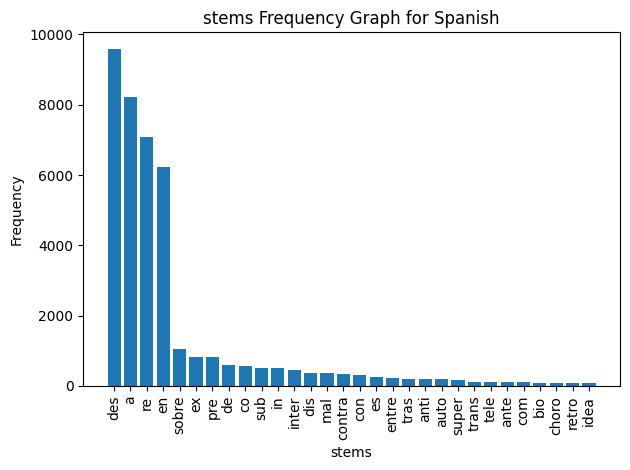

In [19]:
plot_histogram(df, "stems", LANGS["spa"])

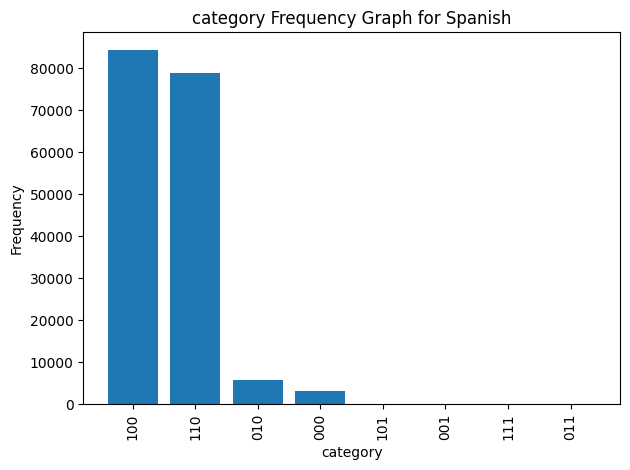

In [20]:
plot_histogram(df, "category", LANGS["spa"])

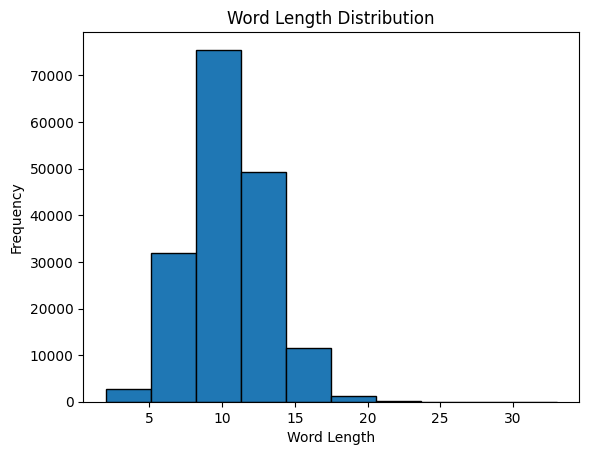

In [21]:
plt.hist(df['word_len'], bins=10, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution')
plt.show()

In [22]:
def get_corpora() -> pd.DataFrame:
    """Obtiene y combina datos de corpus de diferentes idiomas en un DataFrame
    obteniendo corpora multilingüe

    Returns:
    -------
    pd.DataFrame
        Un DataFrame que contiene los datos de corpus combinados de varios idiomas.
    """
    corpora = pd.DataFrame()
    for lang in LANGS:
        files = get_files(lang)
        raw_data = get_raw_corpus(files)
        dataframe = raw_corpus_to_dataframe(raw_data, lang)
        corpora = dataframe if corpora.empty else pd.concat([corpora, dataframe], ignore_index=True)
    return corpora

corpora = get_corpora()

In [23]:
corpora.lang.unique()

array(['ces', 'eng', 'fra', 'hun', 'spa', 'ita', 'lat', 'rus'],
      dtype=object)

In [24]:
corpora.shape

(972163, 8)

In [27]:
corpora[corpora["lang"] == "eng"].head()

,words,stems,morph,category,lang,word_len,stem_len,morph_len
8000,subsidised,subside,"[subside, @@y, @@ise, @@ed]",110,eng,10,7,4
8001,merchandizes,merchandize,"[merchandize, @@s]",100,eng,12,11,2
8002,undiscounted,un,"[un, @@discount, @@ed]",110,eng,12,2,3
8003,immoveables,in,"[in, @@move, @@able, @@s]",110,eng,11,2,4
8004,leucocratic,leuco,"[leuco, @@cratic]",010,eng,11,5,2


In [28]:
for lang in LANGS:
    df = corpora[corpora["lang"] == lang]
    print(f"Basic stats for {LANGS[lang]}")
    print("Total words:", len(df["words"].unique()))
    print("Total stems:", len(df["stems"].unique()), end="\n\n")

Basic stats for Czech
Total words: 7790
Total stems: 2352

Basic stats for English
Total words: 115126
Total stems: 47928

Basic stats for French
Total words: 63173
Total stems: 16903

Basic stats for Hungarian
Total words: 188074
Total stems: 9288

Basic stats for Spanish
Total words: 172173
Total stems: 18645

Basic stats for Italian
Total words: 92304
Total stems: 21410

Basic stats for Latin
Total words: 176467
Total stems: 51090

Basic stats for Russian
Total words: 156846
Total stems: 19679



In [29]:
# Lista de lenguas con sus colores
LANG_COLORS = {
    'ces': 'blue',
    'eng': 'green',
    'fra': 'red',
    'hun': 'purple',
    'spa': 'orange',
    'ita': 'brown',
    'lat': 'pink',
    'rus': 'gray'
}

def plot_multi_lang(column: str) -> None:
    """Genera un conjunto de subplots para mostrar la distribución
    de los datos de cierta columna en un dataframe para idiomas disponibles.

    Parameters:
    ----------
    column : str
        Nombre de la columna cuya distribución se va a graficar.

    Returns:
    -------
    None
        Esta función muestra los subplots usando matplotlib.
    """
    # Creando plots
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
    fig.suptitle(f"{column} Distribution by Language", fontsize=16)
    # Iteramos sobre las lenguas y sus colores para plotearlos
    for i, (lang, color) in enumerate(LANG_COLORS.items()):
        row = i // 4
        col = i % 4
        ax = axes[row, col]
        corpus = corpora[corpora['lang'] == lang]
        ax.hist(corpus[column], bins=10, edgecolor='black', alpha=0.7, color=color)
        ax.set_title(LANGS[lang])
        ax.set_xlabel(f"{column}")
        ax.set_ylabel("Frequency")

    # Ajustando el layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

    # Mostramos el plot
    plt.show()

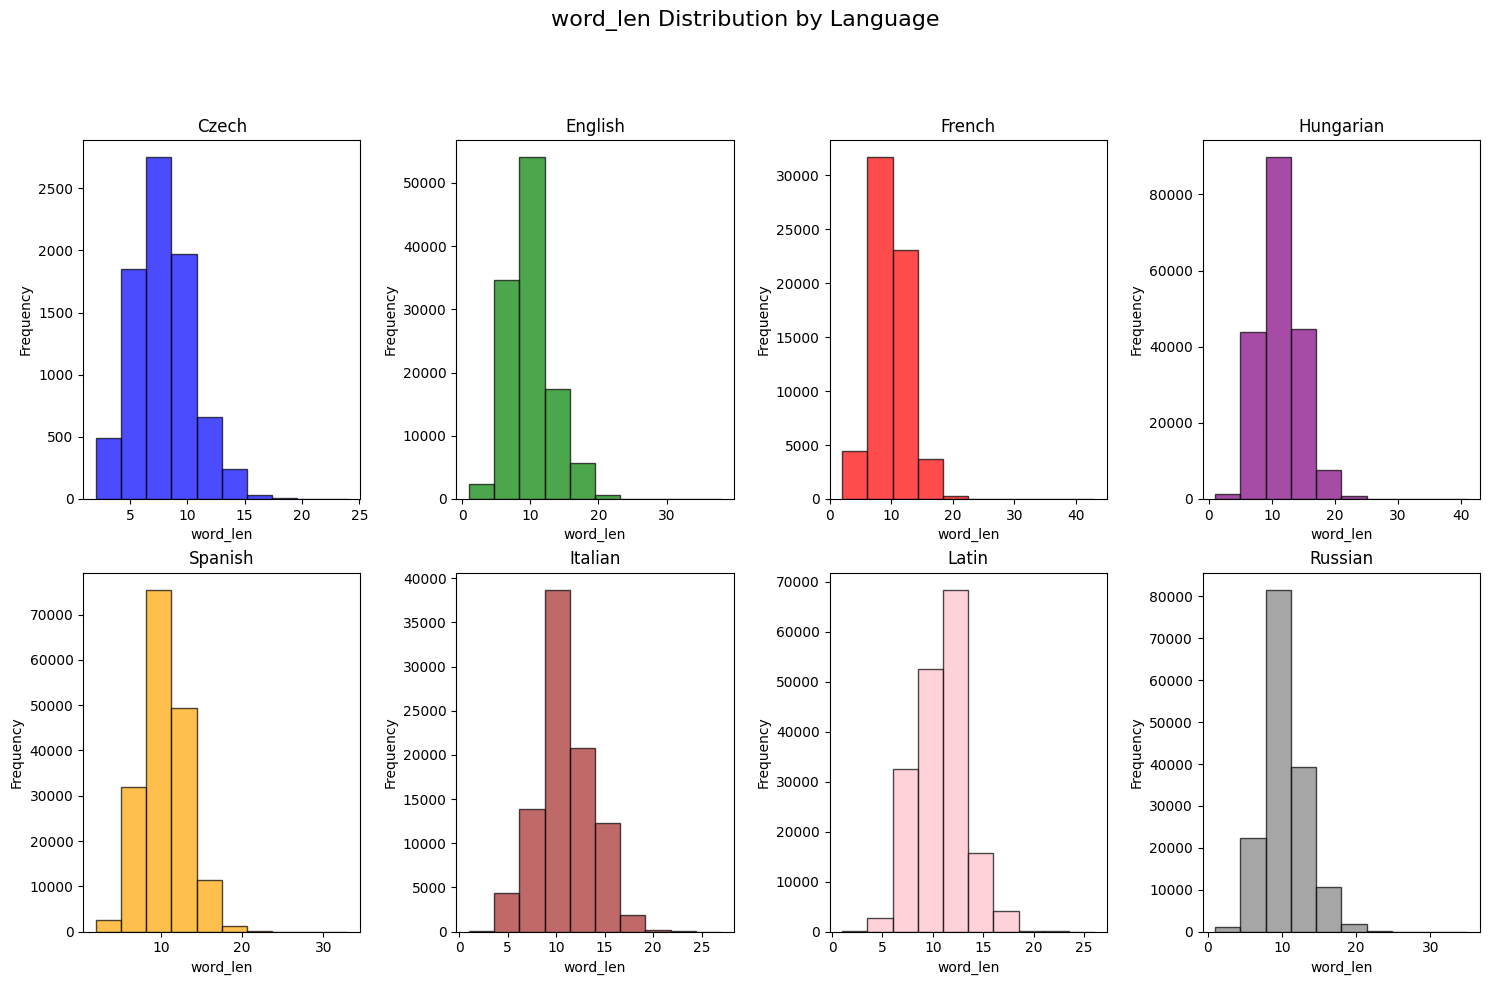

In [30]:
plot_multi_lang("word_len")

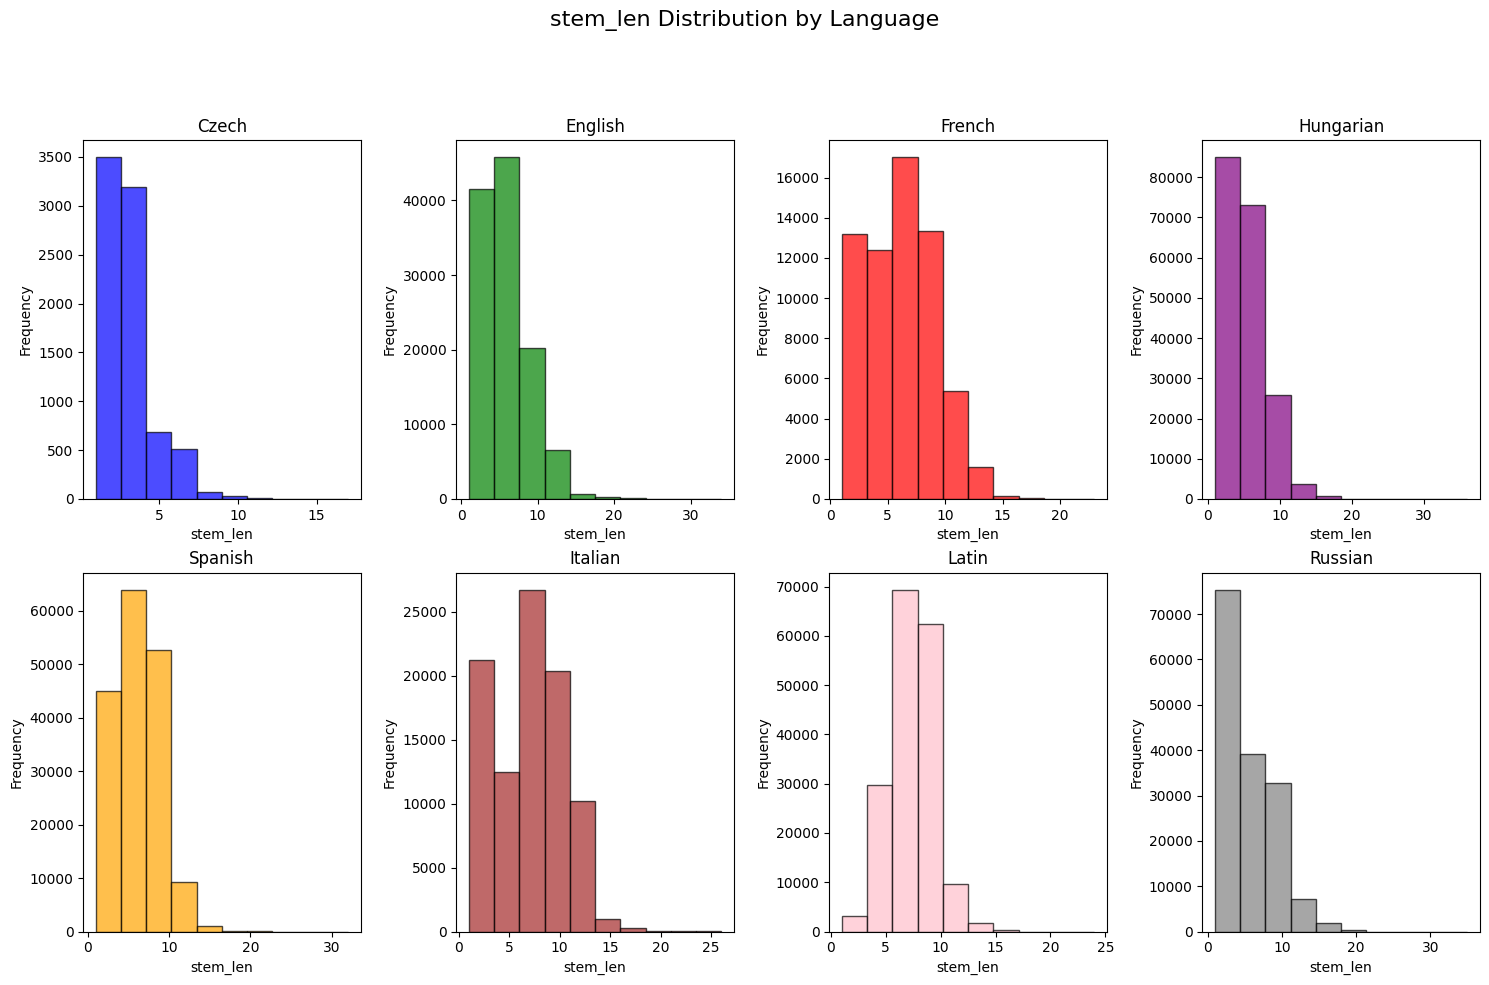

In [31]:
plot_multi_lang("stem_len")

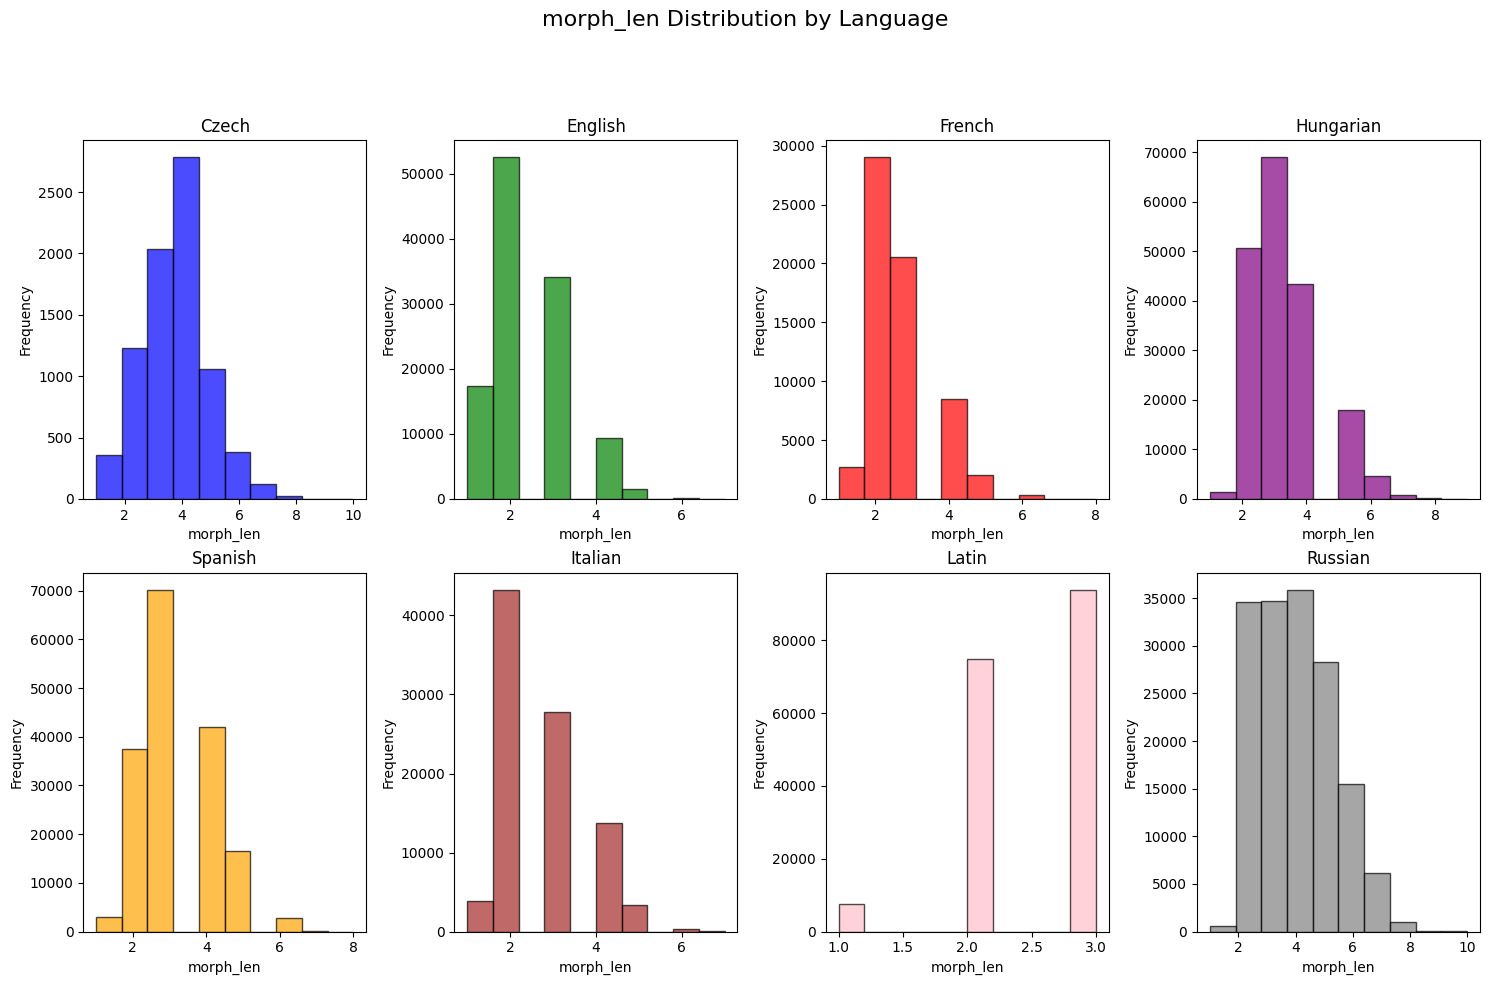

In [32]:
plot_multi_lang("morph_len")

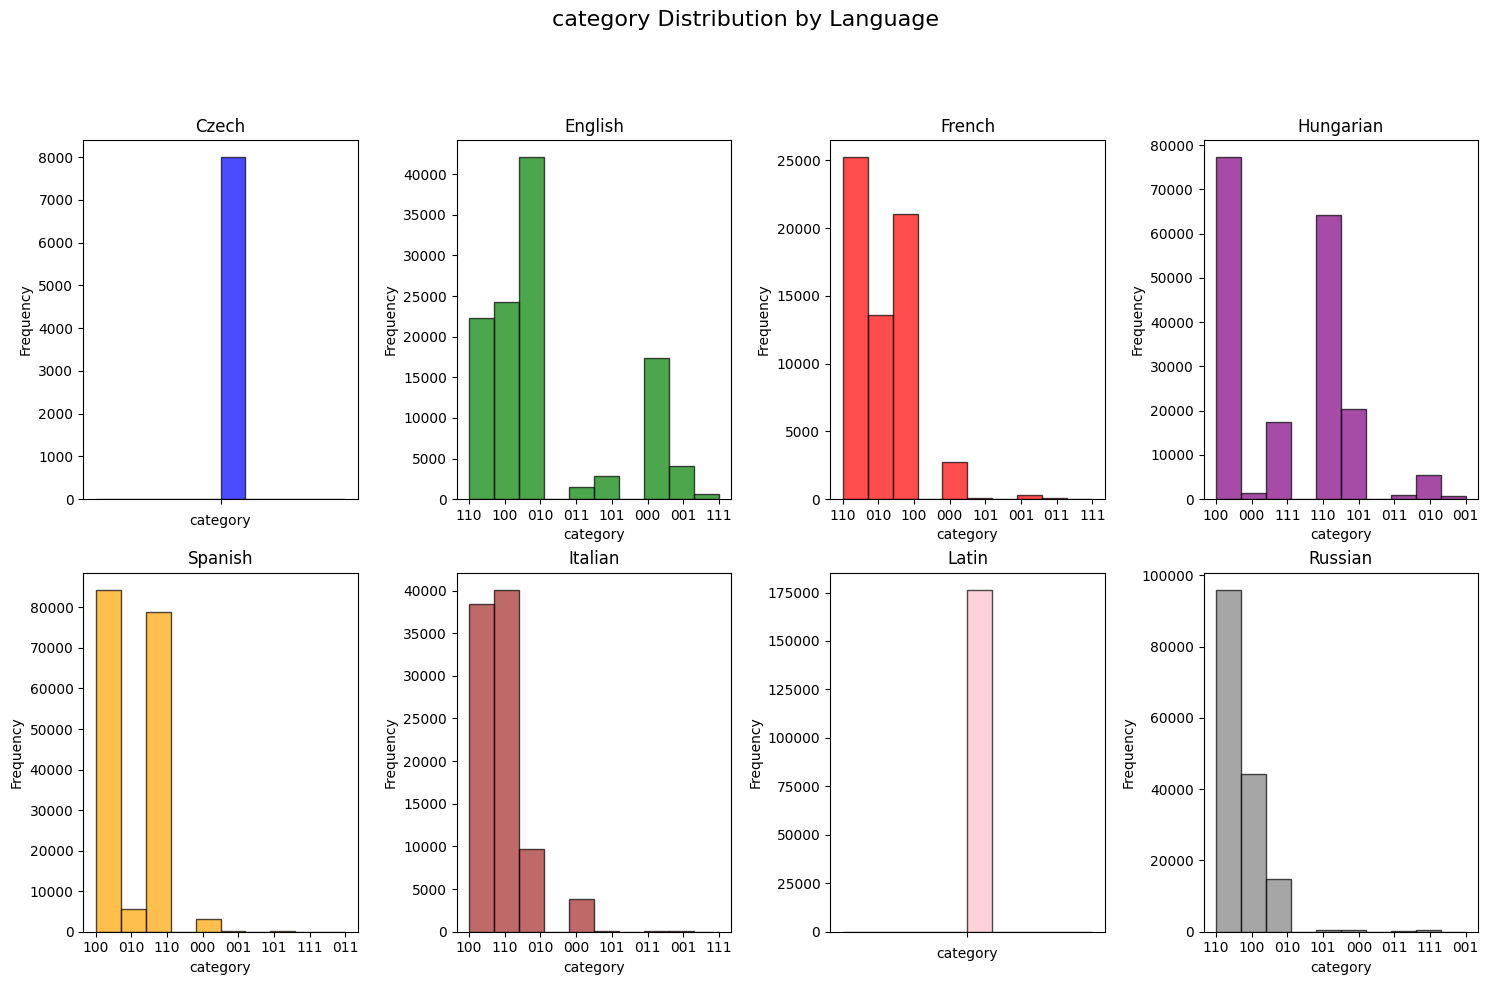

In [ ]:
plot_multi_lang("category")

In [33]:
!python -m spacy download es_core_news_sm
!python -m spacy download en_core_web_sm

2023-08-28 23:47:56.679564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 23:47:57.774171: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 34.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
2023-08-28 23:48:12.245115: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 23:48:13.792311: W tensorflow/compiler/tf2tensorrt/utils/p

In [34]:
import spacy
MODELS = {
    "spa": "es_core_news_sm",
    "eng": "en_core_web_sm"
}
nlp_en = spacy.load(MODELS["eng"])
nlp_es = spacy.load(MODELS["spa"])

In [35]:
def extract_morphology(sentence, nlp):
    doc = nlp(sentence)
    for token in doc:
        print(token, token.morph.to_dict())

In [36]:
extract_morphology("I was reading the practice about morphological analysis", nlp_en)


I {'Case': 'Nom', 'Number': 'Sing', 'Person': '1', 'PronType': 'Prs'}
was {'Mood': 'Ind', 'Number': 'Sing', 'Person': '3', 'Tense': 'Past', 'VerbForm': 'Fin'}
reading {'Aspect': 'Prog', 'Tense': 'Pres', 'VerbForm': 'Part'}
the {'Definite': 'Def', 'PronType': 'Art'}
practice {'Number': 'Sing'}
about {}
morphological {'Degree': 'Pos'}
analysis {'Number': 'Sing'}


In [37]:
extract_morphology("Me estoy comiendo una rica tortita de quesos", nlp_es)

Me {'Case': 'Acc', 'Number': 'Sing', 'Person': '1', 'PrepCase': 'Npr', 'PronType': 'Prs', 'Reflex': 'Yes'}
estoy {'Mood': 'Ind', 'Number': 'Sing', 'Person': '1', 'Tense': 'Pres', 'VerbForm': 'Fin'}
comiendo {'VerbForm': 'Ger'}
una {'Definite': 'Ind', 'Gender': 'Fem', 'Number': 'Sing', 'PronType': 'Art'}
rica {'Gender': 'Fem', 'Number': 'Sing'}
tortita {'Gender': 'Fem', 'Number': 'Sing'}
de {}
quesos {'Gender': 'Masc', 'Number': 'Plur'}


## Práctica 2: Análisis morfológico (parte 1)

**Fecha de entrega: Sábado 03 de Septiembre 2023 6:00pm**

- Obtener 10 oraciones al azar del conjunto de pruebas del corpus SIGMORPH 2022
    - Track: Sentences
    - Guardarlas en un objeto pandas [OPCIONAL]
- Usar las bibliotecas spacy y nltk para realizar los siguientes procesos:
    - Stemming (nltk)
    - Lemmatization (spacy)
    - Obtención de información morfologica (spacy)
    - Imprimir la información en pantalla (formato libre)
- ¿Para qué lenguas? La intersección de las siguientes lenguas:
    - Lenguas disponibles como [modelos pre-entrenados en spacy](https://spacy.io/usage/models)
    - Lenguas disponibles para [stemming en nltk](https://www.nltk.org/api/nltk.stem.snowball.html?highlight=snowball#module-nltk.stem.snowball)
    - Lenguas disponibles en el shared task, track: sentences

**NOTAS**:
- Entregar un archivo `.py` (lo pueden exportar del notebook)
- Incluyan la siguiente información en un `README.md`:
    - Cómo correr el script
    - Que dependencias son necesarias y como instalarlas
